In [12]:
# Install packages
!pip install gdal-3.11.1-cp312-cp312-win_amd64.whl

Processing c:\users\pc\documents\phemelo rutlokoane biostatistics\bioscape\gdal-3.11.1-cp312-cp312-win_amd64.whl


In [1]:
# python imports 
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from spectral.io import envi
from pyproj import Proj
import os
from glob import glob

In [39]:
# Examine Adjacent Quick Look geoTIFF Scenes using GDAL
for geotiff in glob("data/AVIRIS_L3/*.tif"):
    print(f"{os.path.basename(geotiff)}")

ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT_QL.tif


In [40]:
# GDAL to get the number of bands, rows, and columns in the Quicklook files

# open and read tif file
ql_002 = gdal.Open('data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT_QL.tif')

nbands_002 = ql_002.RasterCount
ncols_002 = ql_002.RasterXSize
nrows_002 = ql_002.RasterYSize

print(f"Bands_002:\t{nbands_002}")
print(f"Rows_002:\t{nrows_002}")
print(f"Cols_002:\t{ncols_002}")

Bands_002:	3
Rows_002:	519
Cols_002:	753


In [41]:
# tif projection
ql_002.GetProjection()

'PROJCS["WGS 84 / UTM zone 34S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32734"]]'

In [44]:
# Create a Virtual Raster of the AVIRIS-NG Scene

#build vrt - using AVIRIS-NG quicklook images 

# running gdalbuilvrt as a gdal command line using the '!' in front says do this as a command, not as python
# using scences from the Rhodes Memorial

!gdalbuildvrt rhodes_mosaic.vrt data/AVIRIS_L3/*.tif

# read in vrt, ql ~ quicklook
rhodes_vrt = gdal.Open('rhodes_mosaic.vrt')

nbands_vrt = rhodes_vrt.RasterCount
ncols_vrt = rhodes_vrt.RasterXSize
nrows_vrt = rhodes_vrt.RasterYSize

print(f"Bands_vrt:\t{nbands_vrt}")
print(f"Rows_vrt:\t{nrows_vrt}")
print(f"Cols_vrt:\t{ncols_vrt}")

0...10...20...30...40...50...60...70...80...90...100 - done.
Bands_vrt:	3
Rows_vrt:	519
Cols_vrt:	753


In [45]:
# Examine AVIRIS-NG Quiklook Reflectance Data as a Numerical Array
rhodes_array = rhodes_vrt.ReadAsArray()

# look at the shape. GDAL reads the array as band,x,y.  
print(rhodes_array.shape)

(3, 519, 753)


In [46]:
#To plot the array with matplotlib, the data need to be arranged as y, x, band.
# We'll transpose the data
rhodes_array = rhodes_array.transpose((1,2,0))
print(rhodes_array.shape)

(519, 753, 3)


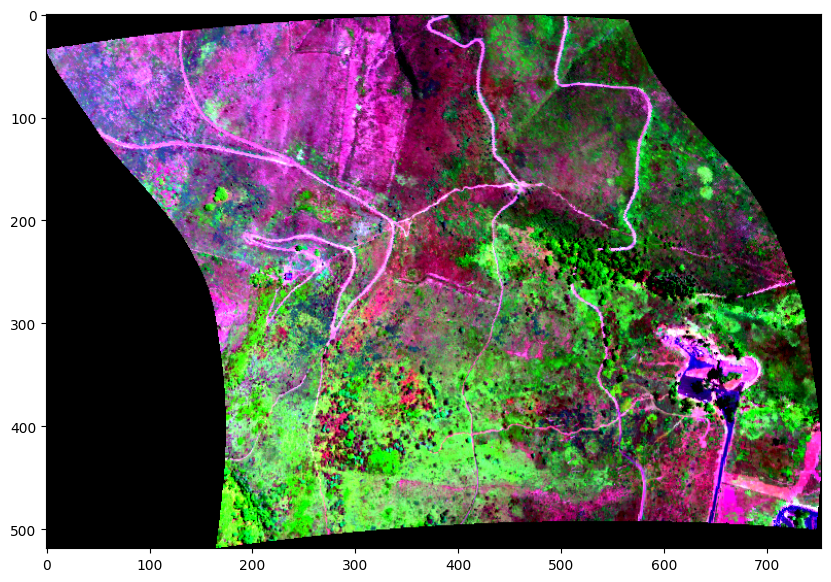

In [47]:
# Display data as image using imshow() function from pyplot module
plt.rcParams['figure.figsize'] = [10,7]
plt.imshow(rhodes_array)

In [ ]:
AVIRIS-NG L2A Reflectance DataCube - Image Spectroscopy (ENVI format)

In [48]:
# Identify image spectroscopy files
for files in glob("data/AVIRIS_L3/*"):
    print(f"{os.path.basename(files)}")

ang20231126t084422_002_L1B_ORT_main_46dd9a4a_LOC.tar.gz
ang20231126t084422_002_L1B_ORT_main_46dd9a4a_LOC_ORT.tar.gz
ang20231126t084422_002_L1B_ORT_main_46dd9a4a_OBS.tar.gz
ang20231126t084422_002_L1B_ORT_main_46dd9a4a_OBS_ORT.tar.gz
ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT
ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT.hdr
ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t084422_002_L2A_OE_main_27577724_UNC_ORT.tar.gz


In [ ]:
The current AVIRIS-NG Reflectance Files are in ENVI file formats which are binary/header file pairs

In [49]:
# Examine the header file of one of the ENVI scenes downloaded:
hdr_f = 'data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT.hdr'
with open(hdr_f, mode='r') as hdr:
    lines = (hdr.read())
    print(lines)

ENVI
description = {
  L2A Analytyical per-pixel surface retrieval}
samples = 753
lines = 519
bands = 425
header offset = 0
file type = ENVI Standard
data type = 4
interleave = bil
byte order = 0
map info = {UTM, 1, 1, 263929.7772268808, 6240865.50751282, 1.9, 1.9, 34, South, WGS-84, units=Meters, rotation=0.0}
wavelength units = Nanometers
wavelength = { 377.1956495 , 382.20564950000005 , 387.2156495 , 392.2256495 , 397.2256495 , 402.2356495 , 407.24564949999996 , 412.2556495 , 417.2656495 , 422.27564950000004 , 427.2856495 , 432.29564949999997 , 437.29564949999997 , 442.3056495 , 447.3156495 , 452.3256495 , 457.3356495 , 462.34564950000004 , 467.3556495 , 472.35564949999997 , 477.36564949999996 , 482.3756495 , 487.3856495 , 492.3956495 , 497.4056495 , 502.4156495 , 507.4256495 , 512.4256495000001 , 517.4356495 , 522.4456495000001 , 527.4556495 , 532.4656494999999 , 537.4756495 , 542.4856495 , 547.4856495 , 552.4956495 , 557.5056495 , 562.5156495 , 567.5256495 , 572.5356495 , 577.5456

In [50]:
# Open the ENVI file and read the file bands, row, cols
rfl_002_open = gdal.Open('data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT')

nbands = rfl_002_open.RasterCount
nrows = rfl_002_open.RasterYSize
ncols = rfl_002_open.RasterXSize

print(f"Bands:\t{nbands}")
print(f"Rows:\t{nrows}")
print(f"Cols:\t{ncols}")

Bands:	425
Rows:	519
Cols:	753


In [51]:
# GDAL to get Metadata information
rfl_002_open.GetMetadata()

{'wavelength_units': 'Nanometers',
 'Band_1': 'channel_0 (377.1956495 Nanometers)',
 'Band_2': 'channel_1 (382.20564950000005 Nanometers)',
 'Band_3': 'channel_2 (387.2156495 Nanometers)',
 'Band_4': 'channel_3 (392.2256495 Nanometers)',
 'Band_5': 'channel_4 (397.2256495 Nanometers)',
 'Band_6': 'channel_5 (402.2356495 Nanometers)',
 'Band_7': 'channel_6 (407.24564949999996 Nanometers)',
 'Band_8': 'channel_7 (412.2556495 Nanometers)',
 'Band_9': 'channel_8 (417.2656495 Nanometers)',
 'Band_10': 'channel_9 (422.27564950000004 Nanometers)',
 'Band_11': 'channel_10 (427.2856495 Nanometers)',
 'Band_12': 'channel_11 (432.29564949999997 Nanometers)',
 'Band_13': 'channel_12 (437.29564949999997 Nanometers)',
 'Band_14': 'channel_13 (442.3056495 Nanometers)',
 'Band_15': 'channel_14 (447.3156495 Nanometers)',
 'Band_16': 'channel_15 (452.3256495 Nanometers)',
 'Band_17': 'channel_16 (457.3356495 Nanometers)',
 'Band_18': 'channel_17 (462.34564950000004 Nanometers)',
 'Band_19': 'channel_18 

In [52]:
# GDAL to get Projection Information
print("ENVI image WKT: \n"+str(rfl_002_open.GetProjection()))

ENVI image WKT: 
PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
UTM zone 34S, datum WGS-84 = EPSG Code: 32734
Read one spectral band array and plot it
Red: Band 57 is ~657nm (the center of the Landsat red band)
Green: Band 38 is ~562nm (the center of the Landsat green band)
Blue: Band 22 is ~482nm (the center of the Landsat blue band)

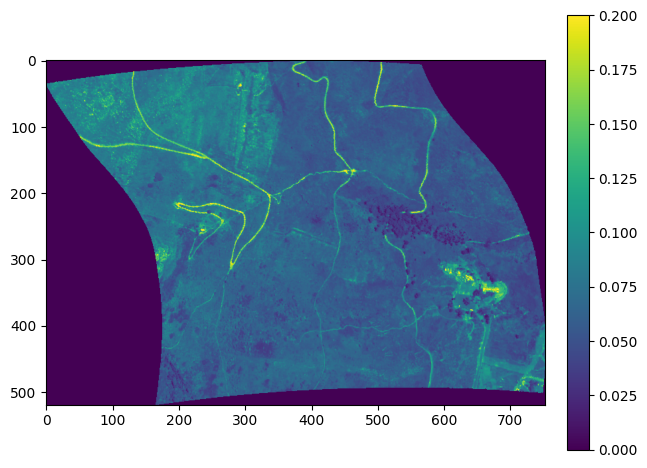

In [53]:
#img_red = rfl_002_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
img_green = rfl_002_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = rfl_002_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
#plt.imshow(img_red, vmin=0, vmax=.20)
plt.imshow(img_green, vmin=0, vmax=0.20)
#plt.imshow(img_blue, vmin=0, vmax=0.20)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [ ]:
Create a Red, Green, Blue Composite and Visualize

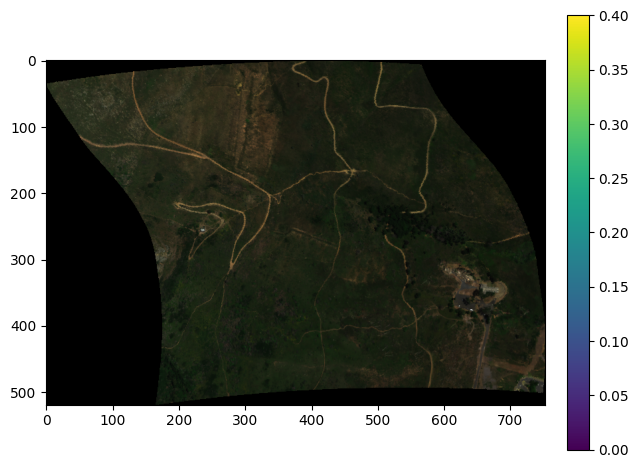

In [54]:
# get r,g,b arrays
red, green, blue = rfl_002_open.GetRasterBand(57).ReadAsArray(), rfl_002_open.GetRasterBand(38).ReadAsArray(), rfl_002_open.GetRasterBand(22).ReadAsArray()

# set fill values (-9999.) to 0 for each array
red[red == -9999.], green[green == -9999.], blue[blue == -9999.] = 0, 0, 0

# function scales reflectance values to 8 bits
scale8bit = lambda a: ((a - a.min()) * (1/(a.max() - a.min()) * 255)).astype('uint8')

# get 8bit arrays for each band
red8, green8, blue8 = scale8bit(red), scale8bit(green), scale8bit(blue)

# set rescaled fill pixels back to 0 for each array
red8[red == 0], green8[green == 0], blue8[blue == 0] = 0, 0, 0

rgb_stack = np.zeros((nrows,ncols,3),'uint8')
rgb_stack[...,0], rgb_stack[...,1], rgb_stack[...,2] = red8, green8, blue8

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [ ]:
Apply a Histogram Stretch to for an Improved Visualization

In [55]:
rgb_stack.shape

(519, 753, 3)

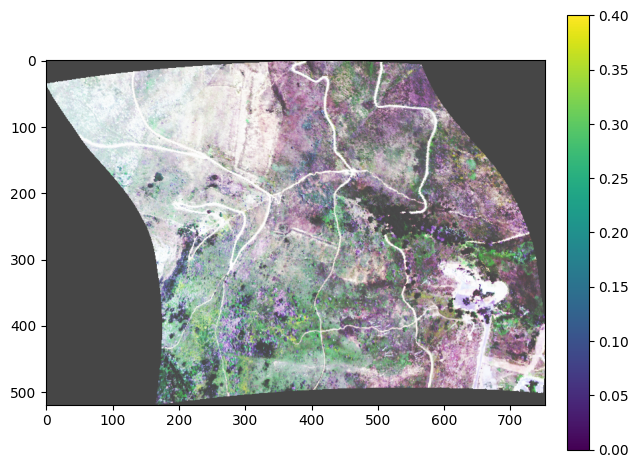

In [56]:
# apply histogram equalization to each band
for i in range(rgb_stack.shape[2]):

    # band i
    b = rgb_stack[:,:,i]
    
    # histogram from flattened (1d) image
    b_histogram, bins = np.histogram(b.flatten(), 256)

    # cumulative distribution function
    b_cumdistfunc = b_histogram.cumsum()

    # normalize
    b_cumdistfunc = 255 * b_cumdistfunc / b_cumdistfunc[-1]

    # get new values by linear interpolation of cdf
    b_equalized = np.interp(b.flatten(), bins[:-1], b_cumdistfunc)
    
    # reshape to 2d and add back to rgb_stack
    rgb_stack[:,:,i] = b_equalized.reshape(b.shape)

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [ ]:
Plot a Spectral Profile From a Point of Interest

In [25]:
# Import modules
import matplotlib.pyplot as plt
from spectral.io import envi
import numpy as np
from pyproj import Proj
import os
from osgeo import gdal

In [ ]:
Plot the spectral profiles for a pixel from the Rhodes memorial

The coordinates we will use are: 
lat: -33.95142512
lon: 18.45648475

In [57]:
# let's define the coordinates and data file from which we'll extract spectra and the lat/lon coordinates
data_file = 'data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT'
coords = [-33.95142512, 18.45648475]
coords

[-33.95142512, 18.45648475]

In [58]:
data_file

'data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT'

In [ ]:
*Geotransform*
Before we can extract pixel spectral information, we need to convert the lat/lon coordinate to an image coordinate (pixel, line) space
- The point location is in a geographic coordinate system
- We saw earlier, the image file is in a UTM zone 34S coordinate reference system
project the lat/lon point from geographic (units = decimal degrees) to the images projected (x,y) UTM coordinates (units = meters)
projected x,y (meter) coordinates need to be translated into a gridded offset of pixel, line values
extract pixel band values for the x,y offset a position
1. Project point location lat/lon to UTM (zone 34S): Recall, the AVIRIS-NG Scene is in UTM zone 34S (EPSG:32734)

In [59]:
# step to translate coordinates
# EPSG:32734 - WGS-84 / UTM zone 34S

from pyproj import Proj
p = Proj("EPSG:32734", preserve_units=False)
x,y = p(18.45648475, -33.95142512)
print('x value in UTM meters:', x)
print('y value in UTM meters:', y)

x value in UTM meters: 264948.99141540634
y value in UTM meters: 6240314.943327792


In [79]:
# Duplicate for different location inside grid
p = Proj("EPSG:32734", preserve_units=False)
x,y = p(18.456426, -33.951409)
print('x value in UTM meters:', x)
print('y value in UTM meters:', y)

x value in UTM meters: 264943.51650568773
y value in UTM meters: 6240316.596605152


In [80]:
coords_UTM = [6240314.943327792, 264948.99141540634]

# define anther location for comparison
coords_UTM2 = [6240316.596605152, 264943.51650568773]

In [67]:
gdal_ds = gdal.Open(data_file)
proj_native = gdal_ds.GetProjection()
proj_native

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [ ]:
2. And now let's get and print AVIRIS-NG Scene information that we need in order to transform the UTM point x,y values to an image row/col location

In [68]:
trans = gdal_ds.GetGeoTransform() # x_ul, x_px, x_rot, y_ul, y_rot, y_px
print('\nGetGeoTransform Return Values =', trans) 


GetGeoTransform Return Values = (263929.7772268808, 1.9, 0.0, 6240865.50751282, 0.0, -1.9)


In [ ]:
GetGeotransform
GT is the geotransform acquired with img.GetGeoTransform()

GT(0): X origin, x_ul, 263929.7772268808
GT(1): X resolution in the pixel space, x_px, 1.9
GT(2). Represent the rotation of the pixel space from the geodetic space, x_rot, 0.0
GT(3). Y origin, y_ul, 6240865.50751282
GT(4). Represent the rotation of the pixel space from the geodetic space, y_rot, 0.0
GT(5): -1 * Y resolution in the pixel space, y_px, -1.9

In [69]:
# Check to see if coordinates fit into grid
from osgeo import gdal
import numpy as np

ds = gdal.Open('data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT')
gt = ds.GetGeoTransform()  # (x_ul, x_px, 0, y_ul, 0, y_px_neg)
nx, ny = ds.RasterXSize, ds.RasterYSize

xmin = gt[0]
xmax = gt[0] + nx*gt[1]
ymax = gt[3]
ymin = gt[3] + ny*gt[5]   # gt[5] < 0

def inside(e, n):
    return (xmin <= e <= xmax) and (ymin <= n <= ymax)

print("extent E:", (xmin, xmax))
print("extent N:", (ymin, ymax))
print("target inside?", inside(263929.7772268808, 6240865.50751282))

extent E: (263929.7772268808, 265360.4772268808)
extent N: (6239879.40751282, 6240865.50751282)
target inside? True


In [70]:
# 3. x,y offset values are a position on the x,y grid of the pixel of interest
x_px_offset = int(round((coords_UTM[1] - trans[0]) / trans[1]))
y_px_offset = int(round((coords_UTM[0] - trans[3]) / trans[5]))

print(x_px_offset, y_px_offset)

536 290


In [81]:
x_px_offset2 = int(round((coords_UTM2[1] - trans[0]) / trans[1]))
y_px_offset2 = int(round((coords_UTM2[0] - trans[3]) / trans[5]))

print(x_px_offset2, y_px_offset2)

534 289


In [72]:
ds = envi.open(os.path.splitext(data_file)[0] + '.hdr')
ds

	Data Source:   '.\data/AVIRIS_L3/ang20231126t084422_002_L2A_OE_main_27577724_RFL_ORT'
	# Rows:            519
	# Samples:         753
	# Bands:           425
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32

In [73]:
offset_size = 1
data = ds.open_memmap(interleave='bip')[y_px_offset - 1: y_px_offset + 1, x_px_offset - 1: x_px_offset + 1, :]
data

memmap([[[-0.01      ,  0.03707601,  0.04295188, ...,  0.19872165,
           0.24510108, -0.01      ],
         [-0.01      ,  0.03692579,  0.04197193, ...,  0.22793618,
           0.33457184, -0.01      ]],

        [[-0.01      ,  0.02514842,  0.02510792, ...,  0.09924927,
           0.10194463, -0.01      ],
         [-0.01      ,  0.03427705,  0.03499448, ...,  0.16357456,
           0.16408338, -0.01      ]]], shape=(2, 2, 425), dtype=float32)

In [82]:
offset_size = 1
data2 = ds.open_memmap(interleave='bip')[y_px_offset2 - 1: y_px_offset2 + 1, x_px_offset2 - 1: x_px_offset2 + 1, :]
data2

memmap([[[-0.01      ,  0.03215912,  0.03301523, ...,  0.10230359,
           0.10360939, -0.01      ],
         [-0.01      ,  0.02661057,  0.03097323, ...,  0.1694448 ,
           0.17255254, -0.01      ]],

        [[-0.01      ,  0.02644406,  0.02617085, ...,  0.07314404,
           0.07578454, -0.01      ],
         [-0.01      ,  0.02958006,  0.03212281, ...,  0.14652239,
           0.15036355, -0.01      ]]], shape=(2, 2, 425), dtype=float32)

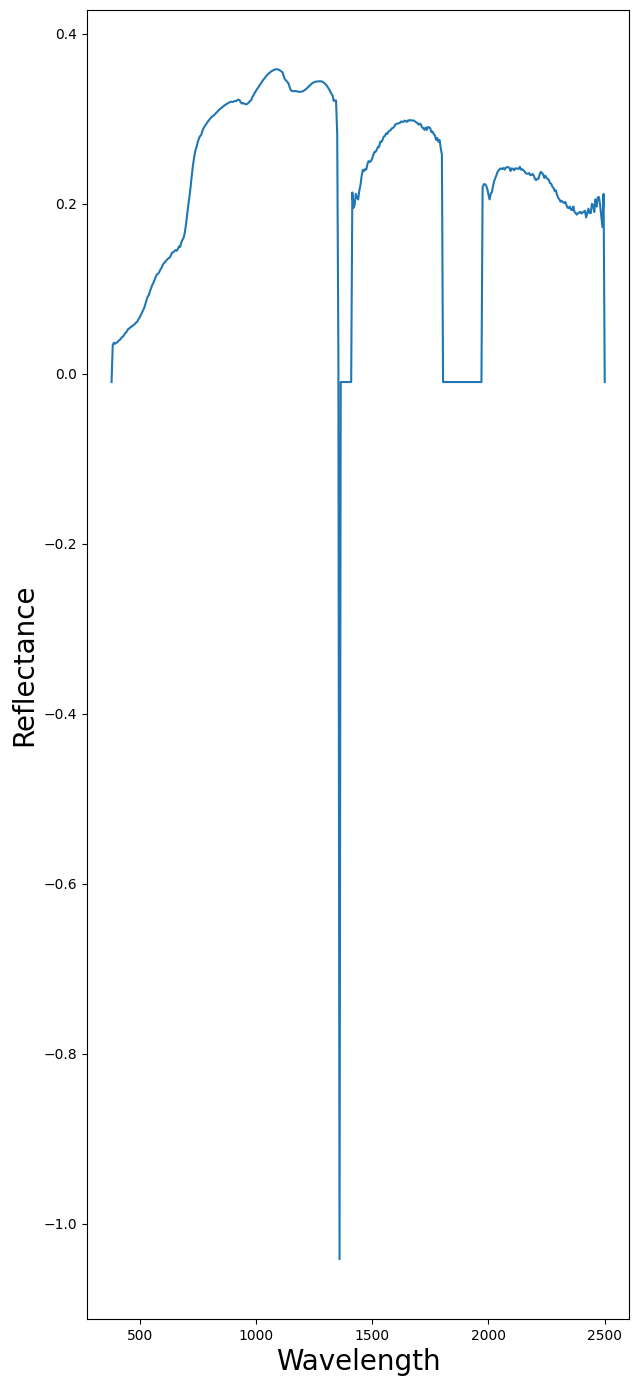

In [75]:
wl = np.array([float(x) for x in ds.metadata['wavelength']])
wl2 = np.array([float(x) for x in ds.metadata['wavelength']])

plt.plot(wl, np.mean(data, axis=(0, 1)))
plt.rcParams['figure.figsize'] = [8, 8]
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

# plot the average spectrum

In [86]:
# Define a list of wavelengths that are "bad" 
# (Show AVIRIS L.argenteum notebook for the bbl values in header)

bblist = np.ones((425,))  # create a 1D array with values ones
# set tails and atmospheric window to zero
bblist[0:0] = 0         # tail
bblist[197:206] = 0     # atmospheric window
bblist[285:318] = 0     # atmospheric window
bblist[424:424] = 0     # tail

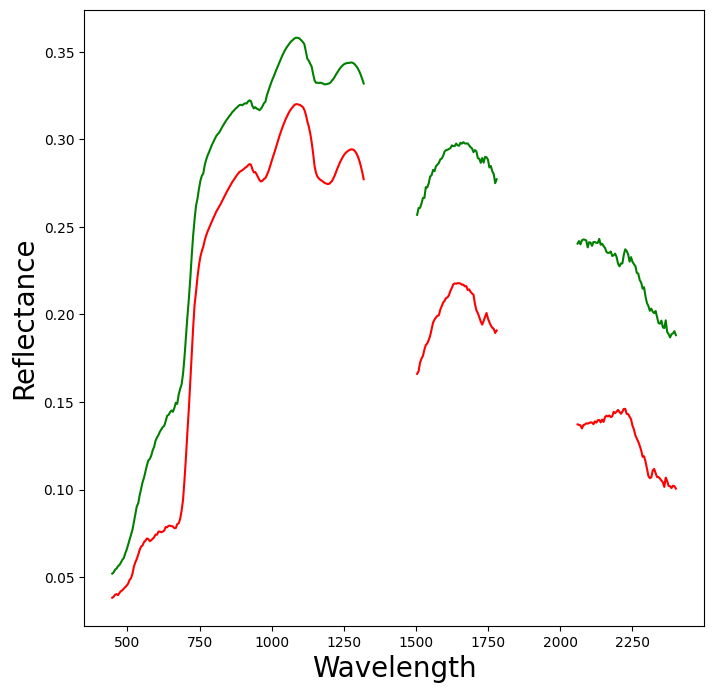

In [85]:
plt.rcParams['figure.figsize'] = [8, 8]

wl[bblist == 0] = np.nan 
wl2[bblist == 0] = np.nan
plt.plot(wl, np.mean(data, axis=(0, 1)), color = 'g')
plt.plot(wl2, np.mean(data2, axis=(0, 1)), color = 'r')
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()